In [ ]:
pip install opendatasets

In [ ]:
pip install pandas

In [ ]:
#d2a97f3064f93838e97f7a81be79374c
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras


from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions



In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

train = train_datagen.flow_from_directory(directory= "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,265), batch_size=32)

val= val_datagen.flow_from_directory(directory= "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,265), batch_size=32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = train.next()


In [ ]:
def plotImage(img_arr, label):
    for im , l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()


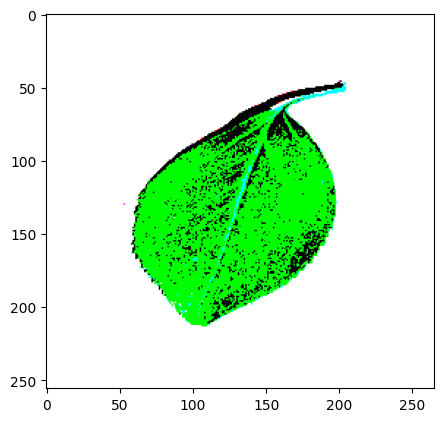

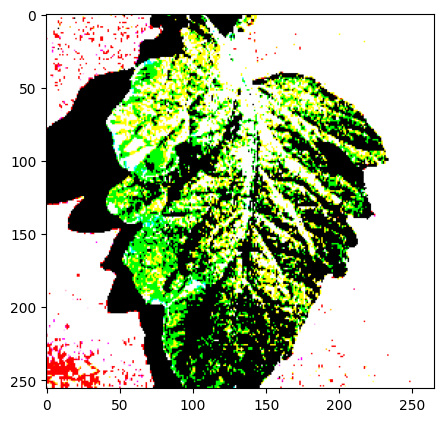

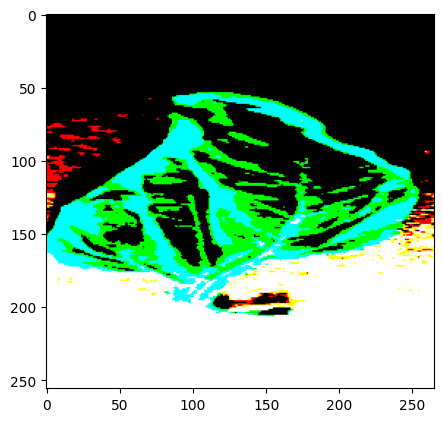

In [ ]:
plotImage(t_img[:3], label[:5])

Building Model


In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
x= Flatten()(base_model.output)
x = Dense(units =38, activation='softmax')(x)

model = Model(base_model.input, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience =3, verbose =1)

mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor='val_accuracy',
                     min_delta=0.01,
                     patience =3,
                     verbose=1,
                     save_best_only=True)

cb =[es, mc]



In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch=16,
                          epochs=50,
                          verbose =1,
                          callbacks=cb,
                          validation_data=val,
                          validation_steps=16)


<ipython-input-61-6cad6d3d6eb2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 24.5065 - accuracy: 0.1934
Epoch 1: val_accuracy improved from -inf to 0.43555, saving model to best_model.h5
16/16 [==============================] - 26s 2s/step - loss: 24.5065 - accuracy: 0.1934 - val_loss: 15.7901 - val_accuracy: 0.4355
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.3122 - accuracy: 0.4785
Epoch 2: val_accuracy improved from 0.43555 to 0.59570, saving model to best_model.h5
16/16 [==============================] - 16s 1s/step - loss: 13.3122 - accuracy: 0.4785 - val_loss: 8.9655 - val_accuracy: 0.5957
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 12.3008 - accuracy: 0.5000
Epoch 3: val_accuracy improved from 0.59570 to 0.66602, saving model to best_model.h5
16/16 [==============================] - 15s 920ms/step - loss: 12.3008 - accuracy: 0.5000 - val_loss: 7.2062 - val_accuracy: 0.6660
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss

In [ ]:
h = his.history
h.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

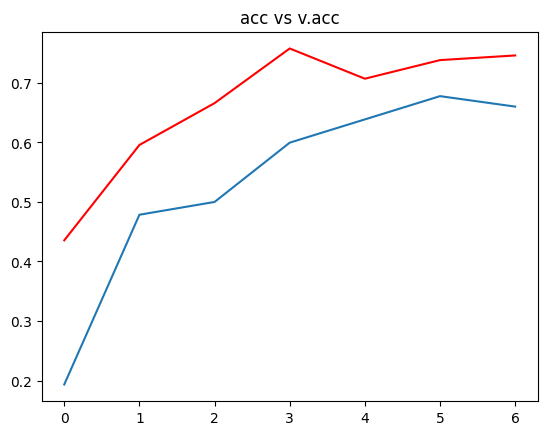

In [ ]:

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v.acc")
plt.show()

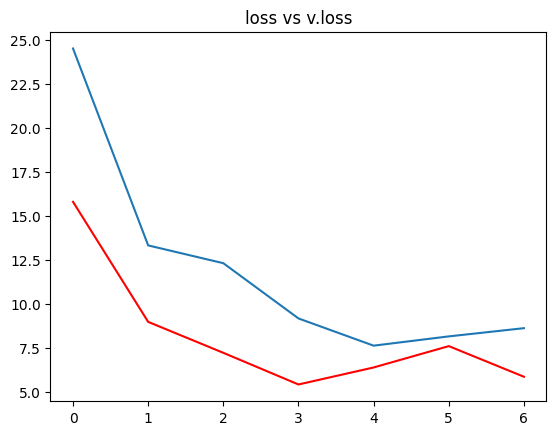

In [ ]:

plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v.loss")
plt.show()

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")


In [ ]:

acc = model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100} %")

<ipython-input-66-3dd475e0eb34>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of your model is = 72.56999611854553 %


In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):

  img = load_img(path , target_size=(256,256))

  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im, axis=0)

  pred = np.argmax(model.predict(img))

  print(f" The image belongs to {ref[pred] } ")



In [ ]:
path= "/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655_270deg.JPG"

prediction(path)


1/1 [==============================] - 0s 153ms/step
 The image belongs to Apple___Cedar_apple_rust 
